# Qiskit Assignment 1
## Single Qubit Circuits

### Learning Objectives
1. Build Pauli gates from Qiskit's U gate
2. Use the U gate to reverse a series of operations
3. Work with various rotations on the bloch sphere
4. Understand IBM's circuit transpilation process

### Resources
Qiskit assignments are designed to be collaborative and open internet. Where possible, links to useful documentation will be embedded within questions. You're free to discuss these tasks with TAs and peers, but do write your own solutions. For some questions, there may be additional restrictions on the ways you can solve them. To ensure compliance with course policies and assignment instructions, we reserve the right to inspect your code.

**NAME**: REPLACE WITH YOUR NAME

**STUDENT ID**: REPLACE WITH YOUR STUDENT ID

In [1]:
# Import Qiskit and other needed packages
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.circuit.random import random_circuit
import numpy as np
import pprint
import random

#### Task 1 - Constructing Pauli Z gate from a U Gate (10 pts)
We can use [Qiskit's U Gate](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.u.html#qiskit.circuit.QuantumCircuit.u) to construct arbitrary quantum operations. Fill in the function below to return a circuit with
- 1 qubit, [initialized](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.initialize.html#qiskit.circuit.QuantumCircuit.initialize) to the parameter `initial_state`
- 1 classical bit
- a U gate with parameters which perform the same rotation as a Pauli Z gate
- a measurement following the rotation

Additionally,
- your solution may not include the Z gate
- parameters for the U gate are expressed in radians; use `np.pi` in place of $\pi$

In [2]:
def qc_pauli_z(initial_state=[1,0]):
    # BEGIN SOLUTION
    theta = 0
    phi = np.pi
    lamda = 0
    
    qc = QuantumCircuit(1,1)
    qc.initialize(initial_state, 0)
    qc.u(theta, phi, lamda, 0)
    qc.measure(0,0)
    return qc
    # END SOLUTION

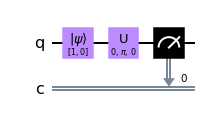

In [3]:
qc_pauli_z().draw(output='mpl')

In [4]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO HAVE 1 CLASSICAL BIT
""" # END TEST CONFIG
qc_pauli_z().num_clbits == 1

True

In [5]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO HAVE 1 QUBIT
""" # END TEST CONFIG
qc_pauli_z().num_qubits == 1

True

In [6]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO NOT CONTAIN A Z GATE
""" # END TEST CONFIG
def testNoQiskitZGate():
    ops = qc_pauli_z().count_ops()
    return 'z' not in ops
    
testNoQiskitZGate()

True

In [7]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO USE initialize() TO SET THE INITIAL STATE TO PARAMETER initial_state
""" # END TEST CONFIG
def testInitialState():
    try:
        num_initializations = qc_pauli_z().count_ops()['initialize']
    except KeyError:
        return False
    else:
        return num_initializations == 1
    
testInitialState()

True

In [8]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO PERFORM 1 MEASUREMENT
""" # END TEST CONFIG
def testMeasurementPerformed():
    try:
        num_measurements = qc_pauli_z().count_ops()['measure']
    except KeyError:
        return False
    else:
        return num_measurements == 1

testMeasurementPerformed()

True

In [9]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO RETURN THE CORRECT RESULT FOR A RANDOM STATE
""" # END TEST CONFIG
def testRandomInitialState():
    results = []
    for i in range(3):
        c = random.uniform(0, 2*np.pi)
        initial_state = [(np.cos(c)), (np.sin(c))]
        pauli_z_matrix = np.array(
                                    [[1, 0],
                                     [0,-1]]
                                 )
        qc = qc_pauli_z(initial_state)
        qc.remove_final_measurements()
        result_sv = Statevector.from_instruction(qc)
        results.append(result_sv.equiv(Statevector(pauli_z_matrix.dot(initial_state))))
    return all(results)

testRandomInitialState()

True

In [10]:
""" # BEGIN TEST CONFIG
hidden: false
points: 4
failure_message: ONE OF THE ABOVE TESTS IS NOT PASSING
""" # END TEST CONFIG
def testNoQiskitZGate():
    ops = qc_pauli_z().count_ops()
    return 'z' not in ops
    
def testInitialState():
    try:
        num_initializations = qc_pauli_z().count_ops()['initialize']
    except KeyError:
        return False
    else:
        return num_initializations == 1
    
def testMeasurementPerformed():
    try:
        num_measurements = qc_pauli_z().count_ops()['measure']
    except KeyError:
        return False
    else:
        return num_measurements == 1
    
def testRandomInitialState():
    results = []
    for i in range(3):
        c = random.uniform(0, 2*np.pi)
        initial_state = [(np.cos(c)), (np.sin(c))]
        pauli_z_matrix = np.array(
                                    [[1, 0],
                                     [0,-1]]
                                 )
        qc = qc_pauli_z(initial_state)
        qc.remove_final_measurements()
        result_sv = Statevector.from_instruction(qc)
        results.append(result_sv.equiv(Statevector(pauli_z_matrix.dot(initial_state))))
    return all(results)

testRandomInitialState() \
and testMeasurementPerformed() \
and testNoQiskitZGate() \
and testInitialState() \
and qc_pauli_z().num_clbits == 1 \
and qc_pauli_z().num_qubits == 1

True

#### Task 2 (2A, 2B, 2C) - Unitary Inverse Puzzles (30 pts)

We'll study the idea of [uncomputation](https://qiskit.org/textbook/ch-algorithms/grover.html#5.2-Uncomputing,-and-Completing-the-Oracle) during our discussion of quantum algorithms. Stated more generally, we may find it helpful to return a qubit to its initial state. 

Solving this problem can be straightforward due to the properties of unitary gates. However, your task is to return the qubit to its initial state using a single U gate. Complete the partial circuits below such that each circuit yields a state equivalent to `initial_state` parameter *up to a global phase*.

#### Task 2A

In [11]:
def reverse_a(initial_state=[1,0]):
    qc = QuantumCircuit(1,1)
    qc.initialize(initial_state)
    qc.x(0)
    qc.h(0)
    qc.y(0)
    qc.x(0)
    qc.z(0)
    qc.barrier()
    
    # BEGIN SOLUTION
    # Can use commutation relation XY = iZ to reduce
    # Find parameters for U(?,?,?) = XH
    theta = 3*np.pi/2
    phi = np.pi
    lamda = np.pi
    qc.u(theta, phi, lamda, 0)
    # END SOLUTION

    qc.barrier()
    qc.measure(0,0)
    return qc

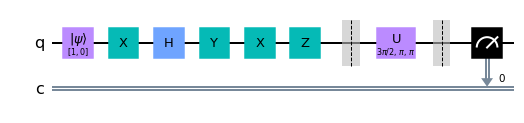

In [12]:
reverse_a().draw(output='mpl')

In [13]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED 1 U GATE TO BE ADDED TO ORIGINAL CIRCUIT
""" # END TEST CONFIG
def testAcceptableGateUsage2A():
    ops = reverse_a().count_ops()
    x = ops['x'] == 2
    y = ops['y'] == 1
    z = ops['z'] == 1
    h = ops['h'] == 1
    try:
        u = ops['u'] == 1
    except KeyError:
        u = False
    return all([x,y,z,h,u])
    
testAcceptableGateUsage2A()

True

In [14]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO RETURN |0> given initial_state=|0>
""" # END TEST CONFIG
def testKetZero2A():
    qc = reverse_a()
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector([1,0]))

testKetZero2A()

True

In [15]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO RETURN |1> given initial_state=|1>
""" # END TEST CONFIG
def testKetOne2A():
    initial_state = [0,1]
    qc = reverse_a(initial_state)
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector([0,1]))

testKetOne2A()

True

In [17]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO RETURN initial_state for a random initial_state
""" # END TEST CONFIG
def testRandomSimple2A():
    c = random.uniform(0, 2*np.pi)
    initial_state = [(np.cos(c)), (np.sin(c))]
    qc = reverse_a(initial_state)
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector(initial_state))

testRandomSimple2A()

True

In [18]:
""" # BEGIN TEST CONFIG
hidden: false
points: 6
failure_message: ONE OF THE ABOVE TESTS IS NOT PASSING
""" # END TEST CONFIG
def testRandomSimple2A():
    c = random.uniform(0, 2*np.pi)
    initial_state = [(np.cos(c)), (np.sin(c))]
    qc = reverse_a(initial_state)
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector(initial_state))

def testAcceptableGateUsage2A():
    ops = reverse_a().count_ops()
    x = ops['x'] == 2
    y = ops['y'] == 1
    z = ops['z'] == 1
    h = ops['h'] == 1
    try:
        u = ops['u'] == 1
    except KeyError:
        u = False
        
    return all([x,y,z,h,u])

def testKetZero2A():
    qc = reverse_a()
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector([1,0]))

def testKetOne2A():
    initial_state = [0,1]
    qc = reverse_a(initial_state)
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector([0,1]))

testRandomSimple2A() \
and testAcceptableGateUsage2A() \
and testKetZero2A() \
and testKetOne2A()

True

#### Task 2B

In [19]:
def reverse_b(initial_state=[1,0]):
    qc = QuantumCircuit(1,1)
    qc.initialize(initial_state)
    for i in range(5):
        qc.x(0)
        qc.y(0)
        qc.z(0)
        qc.h(0)
    qc.barrier()
    
    
    # BEGIN SOLUTION
    # Use commutation relation YX = -iZ
    # so that (HZYX)^5=(-iHZZ)^5=(-iH)^5=-iH
    # Hence to measure state within a global we use
    # parameters for the U gate such that U == H
    theta = np.pi/2
    phi = 0
    lamda = np.pi
    qc.u(theta, phi, lamda, 0)
    # END SOLUTION

    qc.barrier()
    qc.measure(0,0)
    return qc

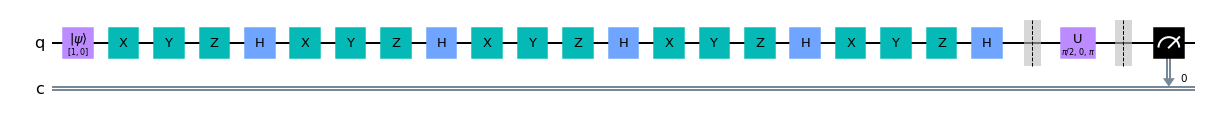

In [20]:
reverse_b().draw(output='mpl')

In [21]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED 1 U GATE TO BE ADDED TO ORIGINAL CIRCUIT
""" # END TEST CONFIG
def testAcceptableGateUsage2B():
    ops = reverse_b().count_ops()
    x = ops['x'] == 5
    y = ops['y'] == 5
    z = ops['z'] == 5
    h = ops['h'] == 5
    try:
        u = ops['u'] == 1
    except KeyError:
        u = False
    return all([x,y,z,h,u])
    
testAcceptableGateUsage2B()

True

In [22]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO RETURN |0> given initial_state=|0>
""" # END TEST CONFIG
def testKetZero2B():
    qc = reverse_b()
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector([1,0]))

testKetZero2B()

True

In [23]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO RETURN |1> given initial_state=|1>
""" # END TEST CONFIG
def testKetOne2B():
    initial_state = [0,1]
    qc = reverse_b(initial_state)
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector([0,1]))

testKetOne2B()

True

In [24]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO RETURN initial_state for a random initial_state
""" # END TEST CONFIG
def testRandomSimple2B():
    c = random.uniform(0, 2*np.pi)
    initial_state = [(np.cos(c)), (np.sin(c))]
    qc = reverse_b(initial_state)
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector(initial_state))

testRandomSimple2B()

True

In [25]:
""" # BEGIN TEST CONFIG
hidden: false
points: 6
failure_message: ONE OF THE ABOVE TESTS IS NOT PASSING
""" # END TEST CONFIG
def testRandomSimple2B():
    c = random.uniform(0, 2*np.pi)
    initial_state = [(np.cos(c)), (np.sin(c))]
    qc = reverse_b(initial_state)
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector(initial_state))

def testAcceptableGateUsage2B():
    ops = reverse_b().count_ops()
    x = ops['x'] == 5
    y = ops['y'] == 5
    z = ops['z'] == 5
    h = ops['h'] == 5
    try:
        u = ops['u'] == 1
    except KeyError:
        u = False
    return all([x,y,z,h,u])

def testKetZero2B():
    qc = reverse_b()
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector([1,0]))

def testKetOne2B():
    initial_state = [0,1]
    qc = reverse_b(initial_state)
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector([0,1]))

testRandomSimple2B() \
and testAcceptableGateUsage2B() \
and testKetZero2B() \
and testKetOne2B()

True

#### Task 2C

**Hint**: The P gate generalizes rotation about the Z-axis to an arbitrary angle $\phi$, where
$P(\phi)=\begin{pmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{pmatrix}$

In [26]:
def reverse_c(initial_state=[1,0]):
    qc = QuantumCircuit(1,1)
    qc.initialize(initial_state)
    qc.x(0)
    for i in range(1,6):
        qc.p((-1)**(i)*np.pi/(2**i), 0)
    qc.z(0)
    qc.barrier()
    
    # BEGIN SOLUTION
    # Trick: combine P gates and Z into a single P gate
    # Note that Z == P(pi)
    # Find parameters for U(?,?,?) = (P(-11pi/32)*X)
    theta = np.pi
    phi = np.pi
    lamda = -21*np.pi/32
    qc.u(theta, phi, lamda, 0)
    # END SOLUTION

    qc.barrier()
    qc.measure(0,0)
    return qc

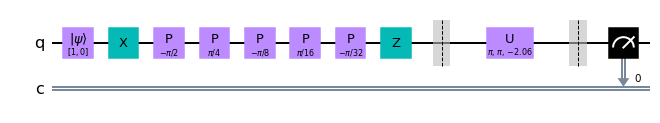

In [27]:
reverse_c().draw(output='mpl')

In [28]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED 1 U GATE TO BE ADDED TO ORIGINAL CIRCUIT
""" # END TEST CONFIG
def testAcceptableGateUsage2C():
    ops = reverse_c().count_ops()
    x = ops['x'] == 1
    y = not 'y' in ops
    z = ops['z'] == 1
    h = not 'h' in ops
    p = ops['p'] == 5
    try:
        u = ops['u'] == 1
    except KeyError:
        u = False
    return all([x,y,z,h,p,u])
    
testAcceptableGateUsage2C()

True

In [29]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO RETURN |0> given initial_state=|0>
""" # END TEST CONFIG
def testKetZero2C():
    qc = reverse_c()
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector([1,0]))

testKetZero2C()

True

In [30]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO RETURN |1> given initial_state=|1>
""" # END TEST CONFIG
def testKetOne2C():
    initial_state = [0,1]
    qc = reverse_c(initial_state)
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector([0,1]))

testKetOne2C()

True

In [31]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO RETURN initial_state for a random initial_state
""" # END TEST CONFIG
def testRandomSimple2C():
    c = random.uniform(0, 2*np.pi)
    initial_state = [(np.cos(c)), (np.sin(c))]
    qc = reverse_c(initial_state)
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector(initial_state))

testRandomSimple2C()

True

In [32]:
""" # BEGIN TEST CONFIG
hidden: false
points: 6
failure_message: Random state not passing.
""" # END TEST CONFIG
def testRandomSimple2C():
    c = random.uniform(0, 2*np.pi)
    initial_state = [(np.cos(c)), (np.sin(c))]
    qc = reverse_c(initial_state)
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector(initial_state))

def testAcceptableGateUsage2C():
    ops = reverse_c().count_ops()
    x = ops['x'] == 1
    y = not 'y' in ops
    z = ops['z'] == 1
    h = not 'h' in ops
    p = ops['p'] == 5
    try:
        u = ops['u'] == 1
    except KeyError:
        u = False
    return all([x,y,z,h,p,u])

def testKetZero2C():
    qc = reverse_c()
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector([1,0]))

def testKetOne2C():
    initial_state = [0,1]
    qc = reverse_c(initial_state)
    qc.remove_final_measurements()
    sv = Statevector.from_instruction(qc)
    return sv.equiv(Statevector([0,1]))
    
testRandomSimple2C() \
and testAcceptableGateUsage2C() \
and testKetOne2C() \
and testKetZero2C()

True

#### Task 3 (3A, 3B, 3C) - Using Rotation to Obtain Probabilities (30 pts)

#### Task 3A 
Fill in the function below to return a single-qubit circuit such that
- the probability of seeing $|1\rangle$ on measurement is `0.25`
- your circuit only uses gates from the following list: X, Y, Z, P, H, U

Verify your solution over `1024` trials and plot the results in a histogram. Do not use the initialize function.

In [33]:
def qc_rot_a():
    # BEGIN SOLUTION
    # Find wave amplitudes for ket zero and ket one
    # Use amplitudes to determine the proportion of rotation needed 
    qc = QuantumCircuit(1,1)
    theta = np.pi/3
    phi = 0
    lamda = 0
    qc.u(theta, phi, lamda, 0)
    qc.measure(0,0)
    return qc
    # END SOLUTION

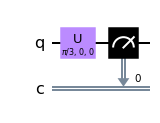

In [34]:
qc_rot_a().draw(output='mpl')

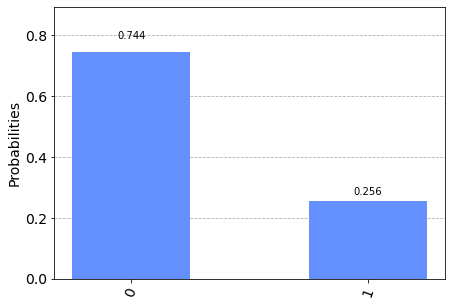

In [35]:
# Plot your results in this cell!

# BEGIN SOLUTION
qc = qc_rot_a()
qasm_sim = BasicAer.get_backend("qasm_simulator")
job = execute(qc, qasm_sim)
counts = job.result().get_counts()
plot_histogram(counts)
# END SOLUTION

#### Task 3B - Rotation Operator Gates
This time, fill in the function below to return a single-qubit circuit such that
- the probability of seeing $|0\rangle$ on measurement is `0.75`
- your circuit only uses gates from the following list: [RX, RY, RZ](https://en.wikipedia.org/wiki/Quantum_logic_gate#Rotation_operator_gates)

Again, verify your solution over `1024` trials and plot the results in a histogram. Do not use the initialize function.

In [36]:
def qc_rot_b():
    # BEGIN SOLUTION
    # Using the provided link, it can be seen that RX(pi) = -iX
    # From this info and part A, we need to use RX(pi/3) to get the desired state
    qc = QuantumCircuit(1,1)
    qc.rx(np.pi/3, 0)
    qc.measure(0,0)
    return qc
    # END SOLUTION

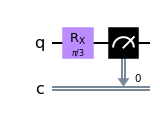

In [37]:
qc_rot_b().draw(output='mpl')

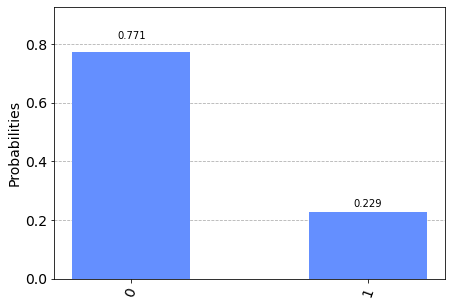

In [38]:
# Plot your results in this cell!

# BEGIN SOLUTION
qasm_sim = BasicAer.get_backend("qasm_simulator")
job = execute(qc_rot_b(), qasm_sim)
counts = job.result().get_counts()
plot_histogram(counts)
# END SOLUTION

#### Task 3C
Suppose we apply a Z gate to your circuit from task 3B just before measuring. How will the probability of seeing $|0\rangle$ change from that of the original circuit? Does the modified circuit produce a state equivalent to the original circuit up to a global phase?

The probability of seeing $|0\rangle$ won't change since Z is just a rotation about the z-axis. However, it's not equivalent up to a global phase since you can't pull out a factor. 

#### Task 4 - P vs. RZ (10 pts)
In task 2C, the P gate was introduced, and in lecture and task 3B, you've seen the RZ gate. Both are related to Z-axis rotations, but what utility is there to having each? Is there a mathematical relationship between them? If so, describe it. 

Feel free to use any resources for your research, including `lecture 6: A single qubit`.

Source: https://quantum-computing.ibm.com/composer/docs/iqx/operations_glossary#phase-gate

The P gate is equivalent up to a global phase with RZ. The P gate applies a phase to $|1\rangle$ of $e^{i\theta}$. Up to a global phase of $e^{i\theta / 2}$, it is equivalent to $RZ(\theta)$


#### Task 5 (5A, 5B) - Transpiling Circuits (20 pts)
When you submit a job to IBM, the quantum computer will most likely run a different circuit than you built. This is because the hardware is capable of performing a very limited set of operations relative to the number of unitary gates. For IBM devices, the transpile step reduces all single-qubit operations to I, X, [SX](https://qiskit.org/documentation/stubs/qiskit.circuit.library.SXGate.html), and RZ ([source](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#7.-The-U-gate--)).

#### Task 5A
- Choose an IBM quantum computer
- Use the [transpile](https://qiskit.org/documentation/stubs/qiskit.compiler.transpile.html) method to optimize the given circuit for the backend
- Draw the transpiled circuit

Note: you do not need the execute function for this task. The goal is just to run the preprocessing step locally.

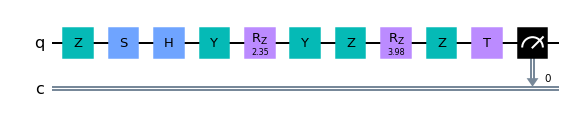

In [39]:
qc_rand = random_circuit(1, 10, measure=True, seed=6)
qc_rand.draw(output='mpl')

ibmq_lima
ibmq_quito
ibmq_manila
ibm_nairobi
ibm_oslo


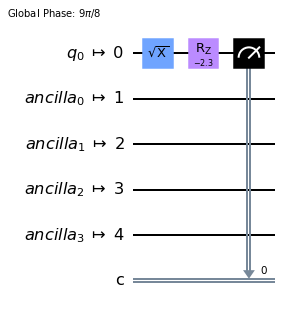

In [40]:
IBMQ.load_account()
# BEGIN SOLUTION
provider = IBMQ.get_provider(hub='ibm-q')
for backend in provider.backends():
    status = backend.status().to_dict()
    if status['operational'] and status['status_msg']=='active':
        if 'simulator' not in status['backend_name']:
            print(status['backend_name'])
            
transpile(qc_rand, provider.get_backend('ibmq_lima')).draw(output='mpl')
# END SOLUTION

#### Task 5B
Which gates and how many of each are used in the transpiled circuit?

SX and RZ are used. There is one SX gate used and one RZ gate used. 

## Conclusion

Next up: the EV bomb!